## Basic EDA

In this notebook, we perform basic data analysis for our dataset. This mostly consists of preparing distribution plots for the numerical features. We also begin to explore the technique of preparing distribution plots for numerical features separated by a categorical feature.

In [1]:
source('src/load_data-02.r')
source('src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
str(Filter(is.numeric, housing_df))

'data.frame':	1451 obs. of  24 variables:
 $ LotFrontage  : num  65 80 68 60 84 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrArea   : num  196 0 162 0 350 0 186 240 0 0 ...
 $ BsmtFinSF1   : int  706 978 486 216 655 732 1369 859 0 851 ...
 $ BsmtFinSF2   : int  0 0 0 0 0 0 0 32 0 0 ...
 $ BsmtUnfSF    : int  150 284 434 540 490 64 317 216 952 140 ...
 $ TotalBsmtSF  : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ FirstFlrSF   : int  856 1262 920 961 1145 796 1694 1107 1022 1077 ...
 $ SecondFlrSF  : int  854 0 866 756 1053 566 0 983 752 0 ...
 $ LowQualFinSF : int  0 0 0 0 0 0 0 0 0 0 ...
 $ GrLivArea    : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ GarageYrBlt  : num  2003 1976 2001 1998 2000 ...
 $ GarageArea   : int  548 460 608 642 836 480 636 484 468 20

In [6]:
colnames(Filter(is.numeric, housing_df))

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [7]:
attach(housing_df)

In [8]:
library(ggplot2)

### Histogram of Target Feature

Here, we display a histogram of the target feature `SalePrice`. We have also included a kernel density estimation (KDE) and the mean and median values plotted as vertical lines. The mean greater than the median signifies a right or positive skew, common with strictly non-negative data.

In [9]:
hist_with_kde <- function (feature) {
    plot <- qplot(feature, geom="histogram", bins=200, alpha=I(.4), y = ..density..)+
        geom_vline(aes(xintercept=mean(feature, rm.na=T), color="mean"), linetype="dashed", size=1, show.legend=TRUE)+
        geom_vline(aes(xintercept=median(feature), color="median"), linetype="dashed", size=1, show.legend=TRUE)+
        geom_density()+
        scale_color_manual("Line.Color", values=c(median="red",mean="blue"))
    return(plot)
}

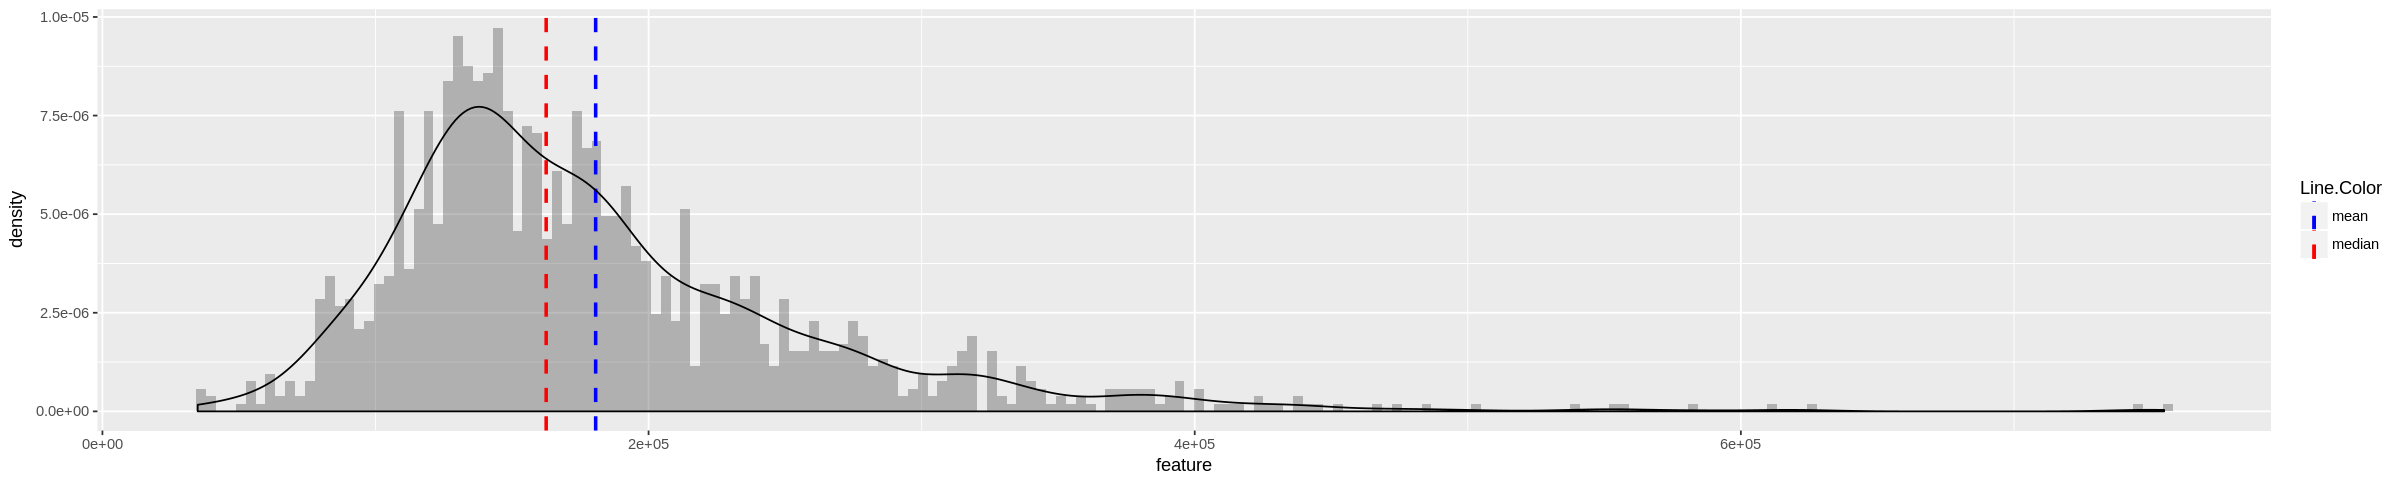

In [10]:
hist_with_kde(SalePrice)

#### Plot some Histograms with KDE Plots for other Numerical Features

Next we plot histograms with KDE plots for some of the other numerical features in our dataset.

In [11]:
colnames(Filter(is.numeric, housing_df))

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

We make use of a special function called `multiplot` that is included in the file `src/multiplot.r`.

In [12]:
library(repr)
options(repr.plot.width=20, repr.plot.height=4)

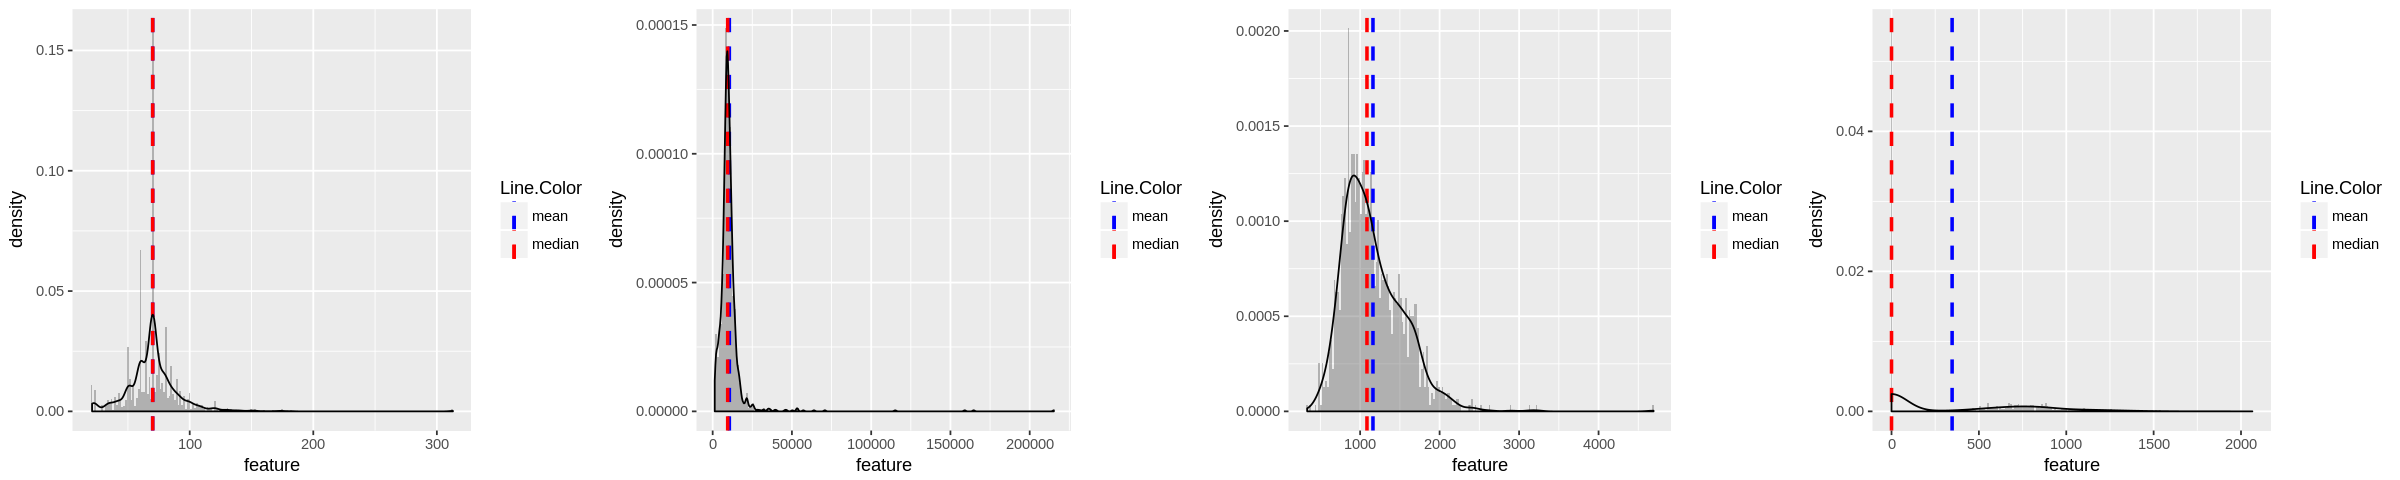

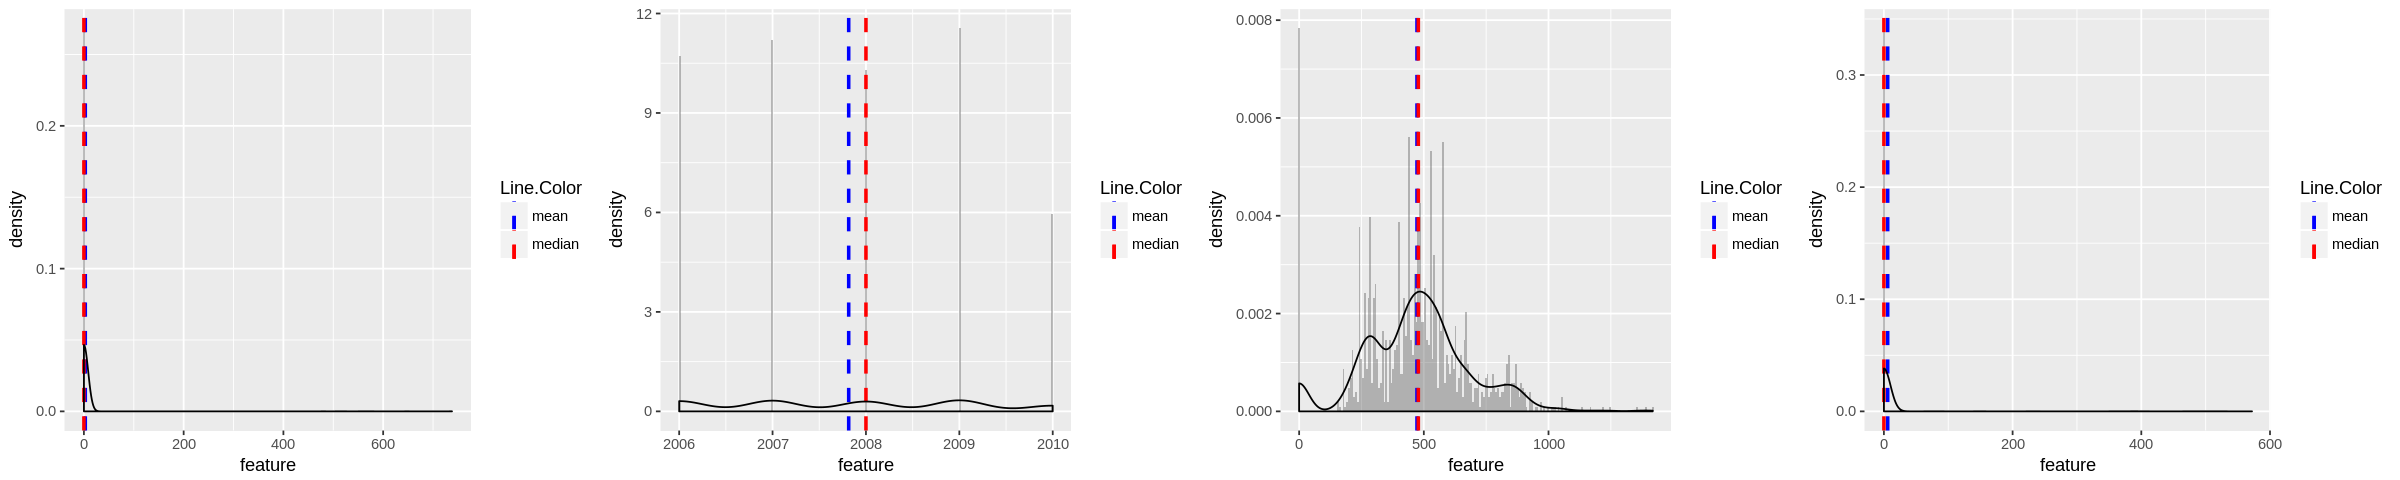

In [13]:
multiplot(hist_with_kde(LotFrontage),
          hist_with_kde(LotArea), 
          hist_with_kde(FirstFlrSF),
          hist_with_kde(SecondFlrSF),
          cols = 4)
multiplot(hist_with_kde(PoolArea),
          hist_with_kde(YrSold), 
          hist_with_kde(GarageArea),
          hist_with_kde(LowQualFinSF),
          cols = 4)


## Correlation

Assessing correlation in a data set with mixed numerical and categorical features can be challenging. One way to perform such an analysis is to prepare a series of distribution plots for a single numerical feature each distribution plot corresponds to the values for the numerical feature for a given attribute of a categorical feature.

Here is a list of our categorical features:

| | | |
|:-:|:-:|:-:|
| `Alley`         | `ExterCond`     | `GarageType`    | `MSSubClass`    |        
| `BedroomAbvGr`  | `Exterior1st`   | `HalfBath`      | `MSZoning`      |                         
| `BldgType`      | `Exterior2nd`   | `Heating`       | `Neighborhood`  |                          
| `BsmtCond`      | `ExterQual`     | `HeatingQC`     | `OverallCond`   |                         
| `BsmtExposure`  | `Fence`         | `HouseStyle`    | `OverallQual`   |                             
| `BsmtFinType1`  | `FireplaceQu`   | `KitchenAbvGr`  | `PavedDrive`    |                           
| `BsmtFinType2`  | `Fireplaces`    | `KitchenQual`   | `PoolQC`        |                      
| `BsmtFullBath`  | `Foundation`    | `LandContour`   | `RoofMatl`      |                         
| `BsmtHalfBath`  | `FullBath`      | `LandSlope`     | `RoofStyle`     |                          
| `BsmtQual`      | `Functional`    | `LotConfig`     | `SaleCondition` |                          
| `CentralAir`    | `GarageCars`    | `LotShape`      | `SaleType`      |                      
| `Condition1`    | `GarageCond`    | `MasVnrType`    | `Street`        |                      
| `Condition2`    | `GarageFinish`  | `MiscFeature`   | `TotRmsAbvGrd`  |                           
| `Electrical`    | `GarageQual`    | `MoSold`        | `Utilities`     |    

We can begin by looking at the distribution of `SalePrice` disaggregated by any one of these categorical features.

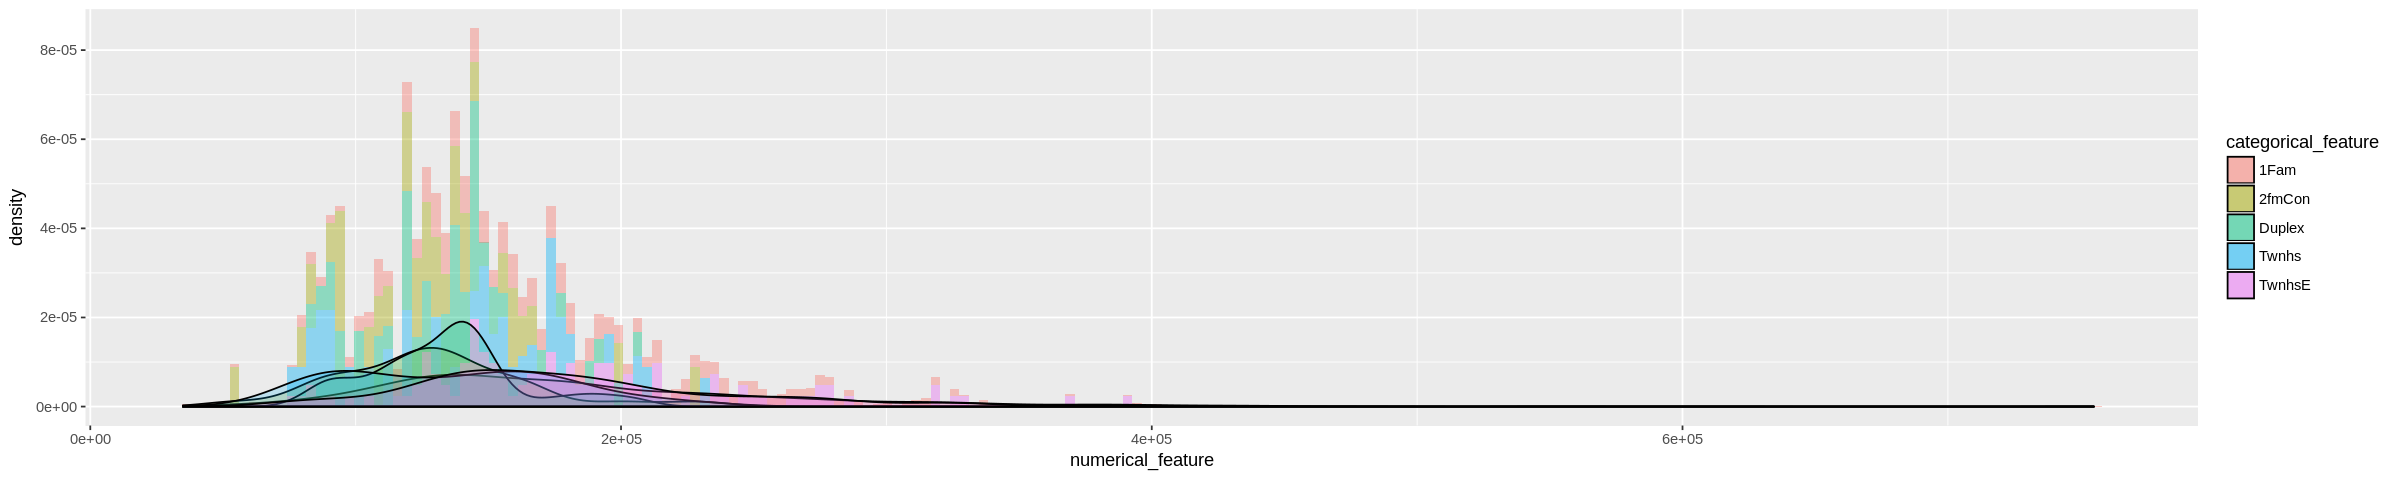

In [14]:
hist_with_kde_numerical_by_category(SalePrice, BldgType)

It may even make sense to treat one of the numerical features as a categorical feature, for example, `YrSold`.

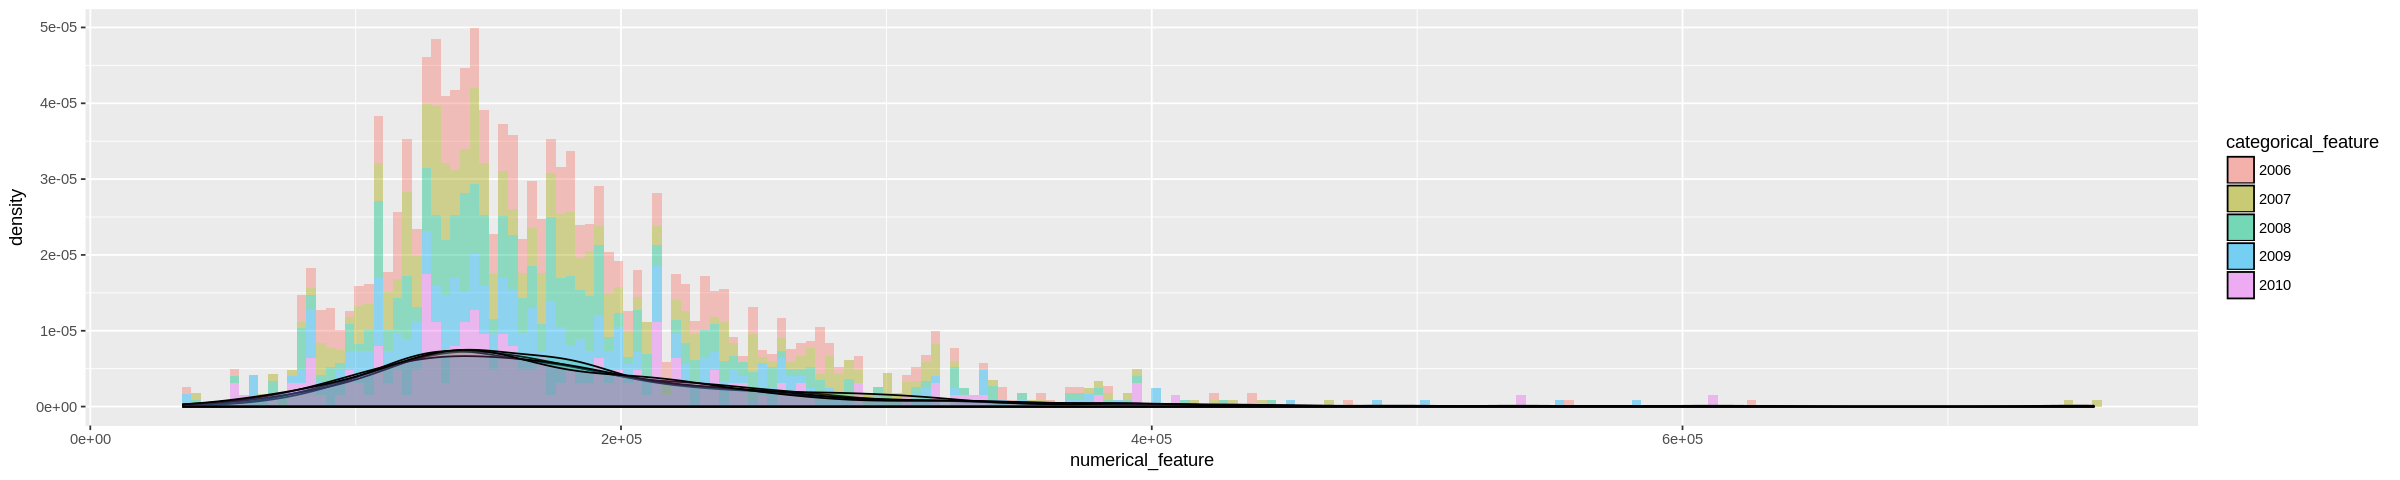

In [15]:
hist_with_kde_numerical_by_category(SalePrice, as.factor(YrSold))

This plot shows that, for this dataset, the year of the sale has nearly no impact on the `SalePrice`. Note that `SalePrice` has a nearly identical distribution for all five years in the dataset.

In [ ]:
multiplot(hist_with_kde_numerical_by_category(SalePrice,HouseStyle),
          hist_with_kde_numerical_by_category(SalePrice,ExterQual), 
          hist_with_kde_numerical_by_category(SalePrice,Street),
          hist_with_kde_numerical_by_category(SalePrice,MoSold),
          cols = 4)

Here, we see that `HouseStyle`, `ExterQual`, and `Street` all have some impact on `SalePrice`, while `MoSold` does not.

Another way to analyze the influence of a categorical feature it is to create a scatter plot of two numerical features, colored by a categorical feature.

In [ ]:
ggplot(housing_df)+
   geom_point(aes(x=GrLivArea,y=SalePrice,colour=MSSubClass))